In [2]:
import pandas as pd
import pingouin as pg
from pathlib import Path
from statannotations.Annotator import Annotator
import seaborn as sns
import matplotlib.pyplot as plt
from fau_colors import cmaps, register_fausans_font

In [3]:
#register_fausans_font()
plt.close("all")

palette = sns.color_palette(cmaps.faculties_light)
sns.set_theme(context="notebook", style="ticks", font="sans-serif", palette=palette)

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["font.family"] = "sans-serif"
#plt.rcParams["font.sans-serif"] = "FAUSans Office"

palette

[(0.3803921568627451, 0.49019607843137253, 0.6313725490196078),
 (0.7137254901960784, 0.7607843137254902, 0.807843137254902),
 (0.996078431372549, 0.807843137254902, 0.4627450980392157),
 (0.42745098039215684, 0.8156862745098039, 0.9647058823529412),
 (0.6745098039215687, 0.8235294117647058, 0.4588235294117647),
 (0.8666666666666667, 0.45098039215686275, 0.48627450980392156)]

In [4]:
data_path = Path("../../../results/data/b-point")

In [5]:
merged_ml_results_b_point_error_metrics = pd.read_csv(data_path.joinpath("merged_ml_results_b_point_error_metrics_rr_only.csv"), index_col=[0,1,2,3])
merged_ml_results_b_point_error_metrics = merged_ml_results_b_point_error_metrics.loc[:, merged_ml_results_b_point_error_metrics.columns.str.endswith('_abs_error')]
merged_ml_results_b_point_error_metrics

arbol2017-isoelectric-crossings_abs_error  \
participant condition phase         heartbeat_id_reference                                              
GDN0005     Dummy     HoldingBreath 0                                                            50.0   
                                    1                                                            64.0   
                                    3                                                             6.0   
                                    4                                                             4.0   
                                    5                                                            12.0   
...                                                                                               ...   
VP_032      tsst      Talk          39                                                           25.0   
                                    40                                                            9.0   
                                    41                                                           23.0   
                                    42                                                           54.0   
                                    43                                                           35.0   

                                                            arbol2017-second-derivative_abs_error  \
participant condition phase         heartbeat_id_reference                                          
GDN0005     Dummy     HoldingBreath 0                                                        10.0   
                                    1                                                        54.0   
                                    3                                                        80.0   
                                    4                                                        46.0   
                                    5                                                        74.0   
...                                                                                           ...   
VP_032      tsst      Talk          39                                                       34.0   
                                    40                                                       24.0   
                                    41                                                       40.0   
                                    42                                                       13.0   
                                    43                                                        6.0   

                                                            arbol2017-third-derivative_abs_error  \
participant condition phase         heartbeat_id_reference                                         
GDN0005     Dummy     HoldingBreath 0                                                        6.0   
                                    1                                                      160.0   
                                    3                                                       10.0   
                                    4                                                        6.0   
                                    5                                                        2.0   
...                                                                                          ...   
VP_032      tsst      Talk          39                                                      14.0   
                                    40                                                       8.0   
                                    41                                                       8.0   
                                    42                                                      55.0   
                                    43                                                      49.0   

                                                            debski1993-second-d

In [6]:
algo_dict = {
    "drost2022_abs_error": "Dro22",
    "MinMax_None_RFR_RR-Interval-Include-Nan_abs_error": "MinMax RFR Include NaN",
    #"SS_None_RFR_RR-Interval-Include-Nan_abs_error": "SS RFR Include NaN",
    "SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error": "SS RFR Impute NaN",
    #"MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error": "MinMax RFR Impute NaN"
}
merged_ml_results_b_point_error_metrics = merged_ml_results_b_point_error_metrics.rename(columns=algo_dict)

In [7]:
absolute_error_long = merged_ml_results_b_point_error_metrics.reset_index().melt(id_vars=['participant', 'condition', 'phase', 'heartbeat_id_reference'], var_name='algorithm', value_name='absolute_error')
absolute_error_long['unique_id'] = absolute_error_long['participant'].astype(str) + '_' + absolute_error_long['condition'].astype(str) + '_' + absolute_error_long['phase'].astype(str) + '_' + absolute_error_long['heartbeat_id_reference'].astype(str)
absolute_error_long

,participant,condition,phase,heartbeat_id_reference,algorithm,absolute_error,unique_id
0,GDN0005,Dummy,HoldingBreath,0,arbol2017-isoelectric-crossings_abs_error,50.000000,GDN0005_Dummy_HoldingBreath_0
1,GDN0005,Dummy,HoldingBreath,1,arbol2017-isoelectric-crossings_abs_error,64.000000,GDN0005_Dummy_HoldingBreath_1
2,GDN0005,Dummy,HoldingBreath,3,arbol2017-isoelectric-crossings_abs_error,6.000000,GDN0005_Dummy_HoldingBreath_3
3,GDN0005,Dummy,HoldingBreath,4,arbol2017-isoelectric-crossings_abs_error,4.000000,GDN0005_Dummy_HoldingBreath_4
4,GDN0005,Dummy,HoldingBreath,5,arbol2017-isoelectric-crossings_abs_error,12.000000,GDN0005_Dummy_HoldingBreath_5
...,...,...,...,...,...,...,...
404599,VP_032,tsst,Talk,39,MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...,9.951963,VP_032_tsst_Talk_39
404600,VP_032,tsst,Talk,40,MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...,4.165623,VP_032_tsst_Talk_40
404601,VP_032,tsst,Talk,41,MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...,10.827221,VP_032_tsst_Talk_41
404602,VP_032,tsst,Talk,42,MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...,28.668703,VP_032_tsst_Talk_42


In [8]:
best_models_data = absolute_error_long[absolute_error_long['algorithm'].isin(algo_dict.values())]
normality_results = pg.normality(data=best_models_data, dv='absolute_error', group='algorithm')
print("Normality Test (Shapiro-Wilk) Results per Algorithm:\n", normality_results)
aov_best_algos = pg.rm_anova(data=best_models_data, dv='absolute_error', within='algorithm', subject='unique_id', detailed=True)
print("Repeated Measures ANOVA results: \n", aov_best_algos)
post_hoc_best_algos = pg.pairwise_tests(data=best_models_data, dv='absolute_error', within='algorithm', subject='unique_id', padjust='bonf', parametric=False)
print("Post-Hoc Test Results:\n", post_hoc_best_algos)

c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11239.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11239.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11138.
  res = hypotest_fun_out(*samples, **kwds)


Normality Test (Shapiro-Wilk) Results per Algorithm:
                                W           pval  normal
algorithm                                              
Dro22                   0.488235  2.897640e-101   False
MinMax RFR Include NaN  0.629882   2.382830e-93   False
SS RFR Impute NaN       0.630789   4.610373e-93   False
Repeated Measures ANOVA results: 
       Source            SS     DF             MS            F  p-unc  \
0  algorithm  7.006602e+05      2  350330.098473  2811.930618    0.0   
1      Error  2.775052e+06  22274     124.587035          NaN    NaN   

   p-GG-corr      ng2       eps sphericity   W-spher  p-spher  
0        0.0  0.07032  0.537637      False  0.140008      0.0  
1        NaN      NaN       NaN        NaN       NaN      NaN  
Post-Hoc Test Results:
     Contrast                       A                       B  Paired  \
0  algorithm                   Dro22  MinMax RFR Include NaN    True   
1  algorithm                   Dro22       SS RFR Impu

Data violates normality and sphericity --> perform friedmann test and nonparametric pairwise test

In [9]:
friedman_results = pg.friedman(data=best_models_data, dv='absolute_error', within='algorithm', subject='unique_id')
print("Friedman Test Results:\n", friedman_results)
post_hoc_friedman = pg.pairwise_ttests(
    data=best_models_data, 
    dv='absolute_error', 
    within='algorithm', 
    subject='unique_id', 
    parametric=False, # This is the key argument to force the non-parametric Wilcoxon test
    padjust='bonf'
)

print("Non-Parametric Post-Hoc Results (Wilcoxon):\n", post_hoc_friedman)

Friedman Test Results:
              Source         W  ddof1            Q  p-unc
Friedman  algorithm  0.313025      2  6972.936949    0.0


c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


Non-Parametric Post-Hoc Results (Wilcoxon):
     Contrast                       A                       B  Paired  \
0  algorithm                   Dro22  MinMax RFR Include NaN    True   
1  algorithm                   Dro22       SS RFR Impute NaN    True   
2  algorithm  MinMax RFR Include NaN       SS RFR Impute NaN    True   

   Parametric       W-val alternative     p-unc    p-corr p-adjust    hedges  
0       False   7910936.5   two-sided  0.000000  0.000000     bonf  0.530982  
1       False   8098930.0   two-sided  0.000000  0.000000     bonf  0.520615  
2       False  29560846.0   two-sided  0.000018  0.000054     bonf -0.013493  


Consider using biospykit statspipeline1 stern: 0.05- 0.01
2: stern: 0.01 - 0.001
3: stern alles drunter < 0.001
pinguin guideline for statistic test
wenn nicht normality oder nicht equal variance dann für alle nicht parametrische rechnen, parameter im pairwise test

p-value annotation legend:
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

Dro22 vs. MinMax RFR Include NaN: Custom statistical test, P_val:0.000e+00
MinMax RFR Include NaN vs. SS RFR Impute NaN: Custom statistical test, P_val:5.369e-05
Dro22 vs. SS RFR Impute NaN: Custom statistical test, P_val:0.000e+00


c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\statannotations\Annotator.py:825: UserWarning: Annotator was reconfigured without applying the test (again) which will probably lead to unexpected results
  warnings.warn("Annotator was reconfigured without applying the "
C:\Users\sebas\AppData\Local\Temp\ipykernel_22432\1139139869.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(['Drost et al.\n(2022)', 'Best Pipeline\nExperiment 1', 'Best Pipeline\nExperiment 2'])


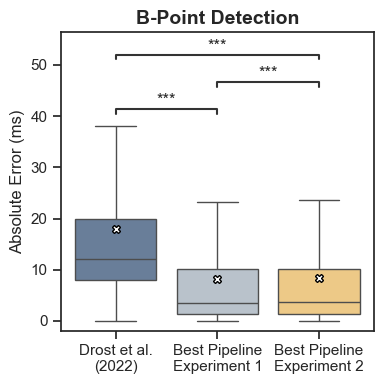

In [13]:
plot_data = best_models_data

pairs = [(row['A'], row['B']) for index, row in post_hoc_friedman[(post_hoc_friedman['A'] == 'Dro22') | (post_hoc_friedman['A'] == 'MinMax RFR Include NaN')].iterrows() if row['p-corr'] < 0.05]
pvalues = [row['p-corr'] for index, row in post_hoc_friedman[(post_hoc_friedman['A'] == 'Dro22') | (post_hoc_friedman['A'] == 'MinMax RFR Include NaN')].iterrows() if row['p-corr'] < 0.05]

custom_pvalue_thresholds = [
    [0.001, "***"],
    [0.01, "**"],
    [0.05, "*"],
]
fig, axs = plt.subplots(figsize=(4, 4))
fig.patch.set_facecolor('none')
sns.boxplot(
    data=plot_data, 
    x="algorithm", 
    y="absolute_error", 
    hue="algorithm", 
    showfliers=False,
    showmeans=True,
    meanprops={"marker":"X", "markeredgecolor":"#000000", "markerfacecolor":"#FFFFFF"},
)

annotator = Annotator(
    axs,
    pairs,
    data=plot_data,
    x='algorithm',
    y='absolute_error'
)

annotator.set_pvalues(pvalues)
annotator.configure(
    test='t-test_paired',
    pvalue_thresholds=custom_pvalue_thresholds,
    text_format='star' # Use stars for significance levels (*** for p<0.001, etc.)
)
annotator.annotate()

plt.ylabel("Absolute Error (ms)")
axs.set_xticklabels(['Drost et al.\n(2022)', 'Best Pipeline\nExperiment 1', 'Best Pipeline\nExperiment 2'])
# axs.patch.set_facecolor('none')
plt.xlabel("")
plt.title("B-Point Detection", fontdict={"weight": "bold", "size": 14})
plt.tight_layout()
plt.show()

Plot on the subsets 
- no feature detection algorithm failed
- at least one feature detection algorithm failed

In [15]:
model_dict = {"MinMax_None_RFR_RR-Interval-Include-Nan_abs_error" :"MinMax RFR Include NaN"}
miss_value_analysis = pd.read_csv(data_path.joinpath("merged_ml_results_b_point_error_metrics.csv"), index_col=[0,1,2,3])
miss_value_analysis["subset"] = "All features detected"
mask_feature_detection_failed = miss_value_analysis['MinMax_KBest_RFR_RR-Interval_abs_error'].isna()
miss_value_analysis.loc[mask_feature_detection_failed, "subset"] = "Feature detection failed"
miss_value_analysis = miss_value_analysis.rename(columns=model_dict)
miss_value_analysis = miss_value_analysis.set_index(['subset'], append=True)
miss_value_analysis = miss_value_analysis[model_dict.values()]
miss_value_analysis_long = miss_value_analysis.reset_index().melt(id_vars=["participant", "condition", "phase", "heartbeat_id_reference", "subset"], var_name="algorithm", value_name="absolute-error")
miss_value_analysis_long

,participant,condition,phase,heartbeat_id_reference,subset,algorithm,absolute-error
0,GDN0005,Dummy,HoldingBreath,0,All features detected,MinMax RFR Include NaN,31.768000
1,GDN0005,Dummy,HoldingBreath,1,All features detected,MinMax RFR Include NaN,0.648000
2,GDN0005,Dummy,HoldingBreath,3,All features detected,MinMax RFR Include NaN,0.256000
3,GDN0005,Dummy,HoldingBreath,4,All features detected,MinMax RFR Include NaN,1.293600
4,GDN0005,Dummy,HoldingBreath,5,All features detected,MinMax RFR Include NaN,0.088444
...,...,...,...,...,...,...,...
11234,VP_032,tsst,Talk,39,All features detected,MinMax RFR Include NaN,0.040000
11235,VP_032,tsst,Talk,40,All features detected,MinMax RFR Include NaN,5.660000
11236,VP_032,tsst,Talk,41,All features detected,MinMax RFR Include NaN,15.168000
11237,VP_032,tsst,Talk,42,All features detected,MinMax RFR Include NaN,26.744000


In [17]:
miss_value_analysis_long[miss_value_analysis_long["subset"] == "All features detected"].describe()

,heartbeat_id_reference,absolute-error
count,10305.000000,10305.000000
mean,27.341679,7.757768
std,18.914244,11.424921
min,0.000000,0.000906
25%,11.000000,1.212388
50%,25.000000,3.260708
75%,41.000000,9.597985
max,97.000000,176.504471


In [18]:
miss_value_analysis_long[miss_value_analysis_long["subset"] == "Feature detection failed"].describe()

,heartbeat_id_reference,absolute-error
count,934.000000,934.000000
mean,27.520343,12.203157
std,19.660547,17.595886
min,0.000000,0.004000
25%,11.000000,2.441908
50%,26.000000,6.357265
75%,42.000000,14.737172
max,92.000000,189.486654


In [19]:
# 1. Test Normality for each subset
normality_results = pg.normality(
    data=miss_value_analysis_long[miss_value_analysis_long['algorithm'] == 'MinMax RFR Include NaN'],
    dv='absolute-error',
    group='subset'
)
print("Normality Test Results per Subset:\n", normality_results)

Normality Test Results per Subset:
                                  W          pval  normal
subset                                                  
All features detected     0.641935  2.187234e-90   False
Feature detection failed  0.616846  3.114437e-41   False


c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10305.
  res = hypotest_fun_out(*samples, **kwds)


Normality is violated --> Perform Mann-Whitney U Test

In [20]:
mwu_results_feature_analysis = pg.pairwise_tests(
    data=miss_value_analysis_long, 
    dv='absolute-error', 
    between='subset', 
    parametric=False, # Forces Mann-Whitney U Test
    padjust='bonf',   
    effsize='hedges' 
)
print("Pairwise pairwise test:\n", mwu_results_feature_analysis)

Pairwise pairwise test:
   Contrast                      A                         B  Paired  \
0   subset  All features detected  Feature detection failed   False   

   Parametric      U-val alternative         p-unc    hedges  
0       False  3739393.5   two-sided  1.293685e-29 -0.368639  


In [21]:
lower_limit = 600
upper_limit = 1000
merged_ml_results_b_point = pd.read_csv(data_path.joinpath("merged_ml_results_b_point_paper_rr_only.csv"), index_col=[0,1,2,3])
group_low_rr_interval_mask = merged_ml_results_b_point['rr_interval_ms_estimated'] < lower_limit
group_low_rr_interval = merged_ml_results_b_point.loc[group_low_rr_interval_mask]
group_medium_rr_interval_mask = ((merged_ml_results_b_point['rr_interval_ms_estimated'] >= lower_limit) & (merged_ml_results_b_point['rr_interval_ms_estimated'] <= upper_limit))
group_medium_rr_interval = merged_ml_results_b_point.loc[group_medium_rr_interval_mask]
group_high_rr_interval_mask = merged_ml_results_b_point['rr_interval_ms_estimated'] > upper_limit
group_high_rr_interval = merged_ml_results_b_point.loc[group_high_rr_interval_mask]

rr_interval_analyis = pd.read_csv(data_path.joinpath("merged_ml_results_b_point_error_metrics.csv"), index_col=[0,1,2,3])
rr_interval_analyis["subset"] = "Medium RR-Interval"
rr_interval_analyis.loc[group_low_rr_interval_mask, "subset"] = "Low RR-Interval"
rr_interval_analyis.loc[group_high_rr_interval_mask, "subset"] = "High RR-Interval"
rr_interval_analyis = rr_interval_analyis.rename(columns=algo_dict)
rr_interval_analyis = rr_interval_analyis.set_index(['subset'], append=True)
rr_interval_analyis = rr_interval_analyis[model_dict.values()]
rr_interval_analyis_long = rr_interval_analyis.reset_index().melt(id_vars=["participant", "condition", "phase", "heartbeat_id_reference", "subset"], var_name="algorithm", value_name="absolute-error")

In [22]:
print(f"All heart rates: {merged_ml_results_b_point.shape[0]}")
print(f"Low RR-Interval heart rates: {group_low_rr_interval.shape[0]}")
print(f"Medium RR-Interval heart rates: {group_medium_rr_interval.shape[0]}")
print(f"High RR-Interval heart rates: {group_high_rr_interval.shape[0]}")

All heart rates: 11239
Low RR-Interval heart rates: 2483
Medium RR-Interval heart rates: 6552
High RR-Interval heart rates: 2103


In [23]:
rr_interval_analyis_long[rr_interval_analyis_long["subset"] == "Low RR-Interval"].describe()

,heartbeat_id_reference,absolute-error
count,2483.000000,2483.000000
mean,26.291180,6.993418
std,18.427204,10.632243
min,0.000000,0.000906
25%,11.000000,1.287923
50%,23.000000,3.223583
75%,41.000000,7.938912
max,97.000000,144.458321


In [24]:
rr_interval_analyis_long[rr_interval_analyis_long["subset"] == "Medium RR-Interval"].describe()

,heartbeat_id_reference,absolute-error
count,6653.000000,6653.000000
mean,28.053059,8.289765
std,19.943216,12.538745
min,0.000000,0.003245
25%,11.000000,1.273677
50%,25.000000,3.531482
75%,42.000000,10.321818
max,94.000000,189.486654


In [25]:
rr_interval_analyis_long[rr_interval_analyis_long["subset"] == "High RR-Interval"].describe()

,heartbeat_id_reference,absolute-error
count,2103.000000,2103.000000
mean,26.410842,8.951540
std,16.182784,12.329943
min,0.000000,0.002239
25%,12.000000,1.205874
50%,26.000000,3.784481
75%,40.000000,12.069897
max,74.000000,120.589972


In [26]:
normality_rr_interval = pg.normality(
    data=rr_interval_analyis_long,
    dv='absolute-error',
    group='subset'
)
print("Normality Test Results per Subset:\n", normality_rr_interval)

Normality Test Results per Subset:
                            W          pval  normal
subset                                            
Medium RR-Interval  0.616675  3.166967e-81   False
High RR-Interval    0.701826  1.252640e-51   False
Low RR-Interval     0.603643  7.137103e-60   False


c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6653.
  res = hypotest_fun_out(*samples, **kwds)


Normality is violated --> Perform Kruskal-Wallis H-test

In [27]:
# Kruskal-Wallis H-test
kruskal_results_rr_interval = pg.kruskal(
    data=rr_interval_analyis_long, 
    dv='absolute-error', 
    between='subset'
)
print("Kruskal-Wallis H-test Results:\n", kruskal_results_rr_interval)

post_hoc_kruskal_rr_interval = pg.pairwise_tests(
    data=rr_interval_analyis_long, 
    dv='absolute-error', 
    between='subset', 
    parametric=False, # Forces Mann-Whitney U Test
    padjust='bonf',   
    effsize='hedges'  
)
print("Non-Parametric Post-Hoc Results (MWU):\n", post_hoc_kruskal_rr_interval)

Kruskal-Wallis H-test Results:
          Source  ddof1          H     p-unc
Kruskal  subset      2  13.502889  0.001169
Non-Parametric Post-Hoc Results (MWU):
   Contrast                 A                   B  Paired  Parametric  \
0   subset  High RR-Interval     Low RR-Interval   False       False   
1   subset  High RR-Interval  Medium RR-Interval   False       False   
2   subset   Low RR-Interval  Medium RR-Interval   False       False   

       U-val alternative     p-unc    p-corr p-adjust    hedges  
0  2765177.5   two-sided  0.000553  0.001659     bonf  0.171106  
1  7124400.5   two-sided  0.202527  0.607580     bonf  0.052984  
2  7922013.5   two-sided  0.002604  0.007813     bonf -0.107567  


In [28]:
inter_rater_analyis = pd.read_csv(data_path.joinpath("merged_ml_results_b_point_error_metrics.csv"), index_col=[0,1,2,3])
inter_rater_agreement = pd.read_csv(data_path.joinpath("inter_rater_agreement.csv"), index_col=[0,1,2,3])
joinable_ids = inter_rater_analyis.index.intersection(inter_rater_agreement.index)
inter_rater_analyis.loc[joinable_ids, 'Agreement'] = inter_rater_agreement.loc[joinable_ids]['Agreement']
inter_rater_analyis = inter_rater_analyis.rename(columns={'Agreement': 'subset'})
inter_rater_analyis = inter_rater_analyis.rename(columns=algo_dict)
inter_rater_analyis = inter_rater_analyis.set_index(['subset'], append=True)
inter_rater_analyis = inter_rater_analyis[model_dict.values()]
inter_rater_analyis_long = inter_rater_analyis.reset_index().melt(id_vars=["participant", "condition", "phase", "heartbeat_id_reference", "subset"], var_name="algorithm", value_name="absolute-error")

In [29]:
inter_rater_analyis_long[inter_rater_analyis_long["subset"] == "Low Agreement"].describe()

,heartbeat_id_reference,absolute-error
count,1829.000000,1829.000000
mean,26.685621,15.170114
std,18.066832,13.759521
min,0.000000,0.004000
25%,11.000000,4.538770
50%,25.000000,11.335725
75%,39.000000,21.949076
max,83.000000,93.189325


In [30]:
inter_rater_analyis_long[inter_rater_analyis_long["subset"] == "Medium Agreement"].describe()

,heartbeat_id_reference,absolute-error
count,1889.000000,1889.000000
mean,25.408152,9.006435
std,18.111184,12.764573
min,0.000000,0.008000
25%,10.000000,2.012000
50%,23.000000,4.808000
75%,38.000000,11.160376
max,82.000000,189.486654


In [31]:
inter_rater_analyis_long[inter_rater_analyis_long["subset"] == "Low Agreement"].describe()

,heartbeat_id_reference,absolute-error
count,1829.000000,1829.000000
mean,26.685621,15.170114
std,18.066832,13.759521
min,0.000000,0.004000
25%,11.000000,4.538770
50%,25.000000,11.335725
75%,39.000000,21.949076
max,83.000000,93.189325


In [32]:
normality_inter_rater_agreement = pg.normality(
    data=inter_rater_analyis_long,
    dv='absolute-error',
    group='subset'
)
print("Normality Test Results per Subset:\n", normality_inter_rater_agreement)

Normality Test Results per Subset:
                          W          pval  normal
subset                                          
High Agreement    0.552552  1.379521e-86   False
Low Agreement     0.868400  1.076948e-36   False
Medium Agreement  0.601479  1.716890e-54   False


c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7193.
  res = hypotest_fun_out(*samples, **kwds)


Normality is violated --> Perform Kruskal-Wallis H-test

In [33]:
# Kruskal-Wallis H-test
kruskal_results_inter_rater = pg.kruskal(
    data=inter_rater_analyis_long, 
    dv='absolute-error', 
    between='subset'
)
print("Kruskal-Wallis H-test Results:\n", kruskal_results_inter_rater)

post_hoc_kruskal_inter_rater = pg.pairwise_tests(
    data=inter_rater_analyis_long, 
    dv='absolute-error', 
    between='subset', 
    parametric=False, # Forces Mann-Whitney U Test
    padjust='bonf',   
    effsize='hedges'  
)
print("Non-Parametric Post-Hoc Results (MWU):\n", post_hoc_kruskal_inter_rater)

Kruskal-Wallis H-test Results:
          Source  ddof1            H          p-unc
Kruskal  subset      2  1425.808021  2.453139e-310
Non-Parametric Post-Hoc Results (MWU):
   Contrast               A                 B  Paired  Parametric      U-val  \
0   subset  High Agreement     Low Agreement   False       False  3021171.0   
1   subset  High Agreement  Medium Agreement   False       False  4991914.5   
2   subset   Low Agreement  Medium Agreement   False       False  2309749.5   

  alternative          p-unc         p-corr p-adjust    hedges  
0   two-sided  4.380322e-280  1.314097e-279     bonf -0.860592  
1   two-sided   1.259210e-70   3.777631e-70     bonf -0.297378  
2   two-sided   7.883445e-71   2.365033e-70     bonf  0.464621  


In [67]:
def plot_inter_feature(axs):
    sns.boxplot(
    data=miss_value_analysis_long,
    x='subset',
    y='absolute-error',
    ax=axs,
    hue='subset',
    showfliers=False, 
    showmeans=True,
    meanprops={"marker":"X", "markeredgecolor":"#000000", "markerfacecolor":"#FFFFFF"},
    )

    # --- Step 3: Add the Significance Bracket using statannotations ---
    # Define the pair you want to compare on the plot
    pairs = [('All features detected', 'Feature detection failed')]

    # Create and configure the annotator
    annotator = Annotator(
        axs,
        pairs,
        data=miss_value_analysis_long,
        x='subset',
        y='absolute-error'
    )

    p_values = [row['p-unc'] for index, row in mwu_results_feature_analysis.iterrows() if row['p-unc'] < 0.05]
    p_values = mwu_results_feature_analysis['p-unc']
    print(p_values[0])
    # Pass the p-value to the annotator and draw the bracket
    annotator.set_pvalues([p_values[0]])
    annotator.configure(
        text_format='star',
        pvalue_thresholds=custom_pvalue_thresholds,
    ).annotate()
    axs.set_xlabel("")
    axs.set_ylabel("Absolute Error (ms)")
    # axs.set_title("a) Feature Detection Performance", fontdict={"weight": "bold", "size": 15})
    axs.set_title("Feature Detection Performance", fontdict={"weight": "bold", "size": 15})

def plot_inter_rr_interval(axs):
    sns.boxplot(
    data=rr_interval_analyis_long,
    x='subset',
    y='absolute-error',
    ax=axs,
    hue='subset',
    showfliers=False,
    showmeans=True,
    meanprops={"marker":"X", "markeredgecolor":"#000000", "markerfacecolor":"#FFFFFF"},
    order=["Low RR-Interval", "Medium RR-Interval", "High RR-Interval"]
    )


    pairs = [(row['A'], row['B']) for index, row in post_hoc_kruskal_rr_interval.iterrows() if row['p-corr'] < 0.05]
    p_values = [row['p-corr'] for index, row in post_hoc_kruskal_rr_interval.iterrows() if row['p-corr'] < 0.05]
    # Create and configure the annotator
    annotator = Annotator(
        axs,
        pairs,
        data=rr_interval_analyis_long,
        x='subset',
        y='absolute-error'
    )

    annotator.set_pvalues(pvalues=p_values)
    annotator.configure(
        text_format='star',
        pvalue_thresholds=custom_pvalue_thresholds,
    ).annotate()
    axs.set_xlabel("")
    axs.set_ylabel("Absolute Error (ms)")
    # axs.set_title("c) RR interval Duration", fontdict={"weight": "bold", "size": 15})
    axs.set_title("RR interval Duration", fontdict={"weight": "bold", "size": 15})
    axs.set_xticklabels([
    # r'Low RR interval' + '\n' + r'$RR < 600 \text{ ms}$', 
    # r'Medium RR interval' + '\n' + r'$600 \text{ ms} \leq RR \leq 1000 \text{ ms}$', 
    # r'High RR interval' + '\n' + r'$RR > 1000 \text{ ms}$'
    r'Low RR interval' + '\n' + r'[0, 600) ms', 
    r'Medium RR interval' + '\n' + r'[600, 1000] ms', 
    r'High RR interval' + '\n' + r'[1000, $\infty$) ms'
])

def plot_inter_rater(axs):
    sns.boxplot(
        data=inter_rater_analyis_long,
        x='subset',
        y='absolute-error',
        ax=axs,
        hue='subset',
        hue_order=['Low Agreement', 'Medium Agreement', 'High Agreement'],
        order=['Low Agreement', 'Medium Agreement', 'High Agreement'],
        legend=False,
        showfliers=False,
        showmeans=True,
        meanprops={"marker":"X", "markeredgecolor":"#000000", "markerfacecolor":"#FFFFFF"},
    )


    pairs = [(row['A'], row['B']) for index, row in post_hoc_kruskal_inter_rater.iterrows() if row['p-corr'] < 0.05]
    p_values = [row['p-corr'] for index, row in post_hoc_kruskal_inter_rater.iterrows() if row['p-corr'] < 0.05]
    # Create and configure the annotator
    annotator = Annotator(
        axs,
        pairs,
        data=inter_rater_analyis_long,
        x='subset',
        y='absolute-error',
    )

    annotator.set_pvalues(pvalues=p_values)
    annotator.configure(
        text_format='star',
        pvalue_thresholds=custom_pvalue_thresholds,
    ).annotate()
    axs.set_xlabel("")
    axs.set_ylabel("Absolute Error (ms)")
    # axs.set_title("b) Inter-Rater Agreement", fontdict={"weight": "bold", "size": 15})
    axs.set_title("Inter-Rater Agreement", fontdict={"weight": "bold", "size": 15})
    axs.set_xticklabels([
    # r'Low Agreement' + '\n' + r'$\Delta r > 10$ ms', 
    # r'Medium Agreement' + '\n' + r'$4 \text{ ms} \leq \Delta r \leq 10$ ms', 
    # r'High Agreement' + '\n' + r'$\Delta r < 4$ ms'
    r'Low Agreement' + '\n' + r'(10, $\infty$) ms', 
    r'Medium Agreement' + '\n' + r'[4, 10] ms', 
    r'High Agreement' + '\n' + r'[0, 4) ms'
])



1.293685103770761e-29
p-value annotation legend:
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

All features detected vs. Feature detection failed: Custom statistical test, P_val:1.294e-29
p-value annotation legend:
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

High Agreement vs. Low Agreement: Custom statistical test, P_val:1.314e-279
Low Agreement vs. Medium Agreement: Custom statistical test, P_val:2.365e-70


c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\statannotations\Annotator.py:825: UserWarning: Annotator was reconfigured without applying the test (again) which will probably lead to unexpected results
  warnings.warn("Annotator was reconfigured without applying the "
c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\statannotations\Annotator.py:825: UserWarning: Annotator was reconfigured without applying the test (again) which will probably lead to unexpected results
  warnings.warn("Annotator was reconfigured without applying the "


High Agreement vs. Medium Agreement: Custom statistical test, P_val:3.778e-70
p-value annotation legend:
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

High RR-Interval vs. Low RR-Interval: Custom statistical test, P_val:1.659e-03
Medium RR-Interval vs. Low RR-Interval: Custom statistical test, P_val:7.813e-03


C:\Users\sebas\AppData\Local\Temp\ipykernel_22432\3235845953.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([
c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\statannotations\Annotator.py:825: UserWarning: Annotator was reconfigured without applying the test (again) which will probably lead to unexpected results
  warnings.warn("Annotator was reconfigured without applying the "
C:\Users\sebas\AppData\Local\Temp\ipykernel_22432\3235845953.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([


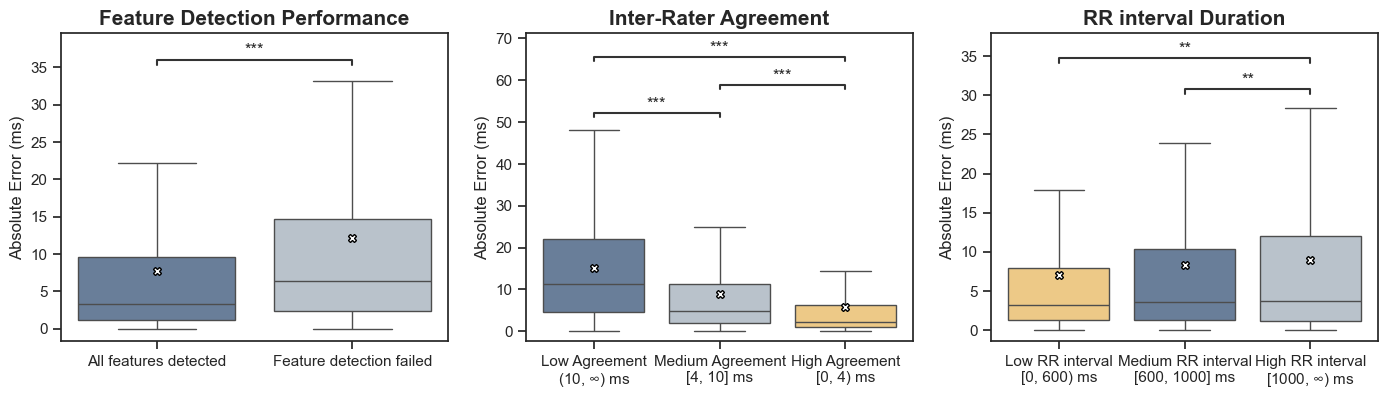

In [68]:
fig, axs = plt.subplots(1, 3, figsize=(17, 4))
fig.patch.set_facecolor('none')
axs[0] = plot_inter_feature(axs=axs[0])
axs[1] = plot_inter_rater(axs=axs[1])
axs[2] = plot_inter_rr_interval(axs=axs[2])

1.293685103770761e-29
p-value annotation legend:
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

All features detected vs. Feature detection failed: Custom statistical test, P_val:1.294e-29


c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\statannotations\Annotator.py:825: UserWarning: Annotator was reconfigured without applying the test (again) which will probably lead to unexpected results
  warnings.warn("Annotator was reconfigured without applying the "


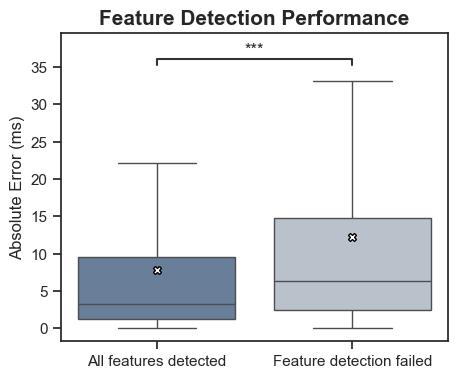

In [57]:
fig, axs = plt.subplots(1, 1, figsize=(5, 4))
fig.patch.set_facecolor('none')
axs = plot_inter_feature(axs=axs)

p-value annotation legend:
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

High Agreement vs. Low Agreement: Custom statistical test, P_val:1.314e-279
Low Agreement vs. Medium Agreement: Custom statistical test, P_val:2.365e-70
High Agreement vs. Medium Agreement: Custom statistical test, P_val:3.778e-70


c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\statannotations\Annotator.py:825: UserWarning: Annotator was reconfigured without applying the test (again) which will probably lead to unexpected results
  warnings.warn("Annotator was reconfigured without applying the "
C:\Users\sebas\AppData\Local\Temp\ipykernel_22432\3235845953.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([


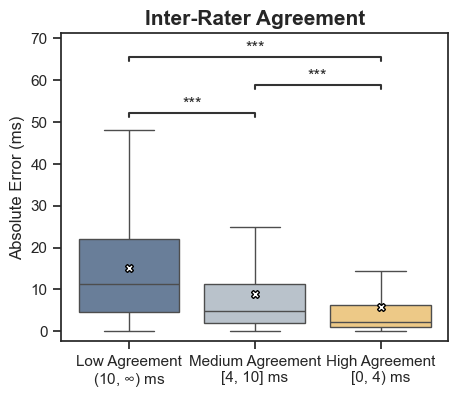

In [56]:
fig, axs = plt.subplots(1, 1, figsize=(5, 4))
fig.patch.set_facecolor('none')
axs = plot_inter_rater(axs=axs)

p-value annotation legend:
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

High RR-Interval vs. Low RR-Interval: Custom statistical test, P_val:1.659e-03
Medium RR-Interval vs. Low RR-Interval: Custom statistical test, P_val:7.813e-03


c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\statannotations\Annotator.py:825: UserWarning: Annotator was reconfigured without applying the test (again) which will probably lead to unexpected results
  warnings.warn("Annotator was reconfigured without applying the "
C:\Users\sebas\AppData\Local\Temp\ipykernel_22432\3235845953.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([


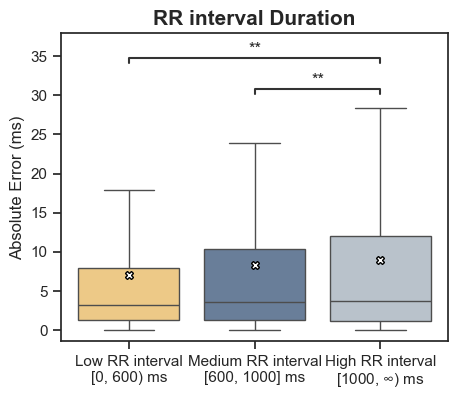

In [55]:
fig, axs = plt.subplots(1, 1, figsize=(5, 4))
fig.patch.set_facecolor('none')
axs = plot_inter_rr_interval(axs=axs)